In [54]:
# Andrew Kistner
# 11-18-22
# Homework 3
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

movies = pd.read_csv("movies.csv")
movies.head(10)

,budget,gross,runtime,score,votes
0,8000000,52287414,89,8.1,299174
1,6000000,70136369,103,7.8,264740
2,15000000,179800601,110,6.9,236909
3,18500000,85160248,137,8.4,540152
4,9000000,18564613,90,6.9,36636
5,6000000,138530565,120,8.1,317585
6,25000000,12729917,101,7.4,102879
7,6000000,8551228,120,7.8,146768
8,9000000,40471663,96,6.8,60565
9,15000000,40456565,96,7.5,129698


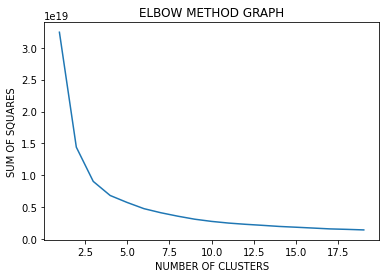

In [3]:
inert_list = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(movies)
    inert_list.append(kmeans.inertia_)

plt.plot(range(1,20), inert_list)
plt.title("ELBOW METHOD GRAPH")
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel("SUM OF SQUARES")
plt.show()

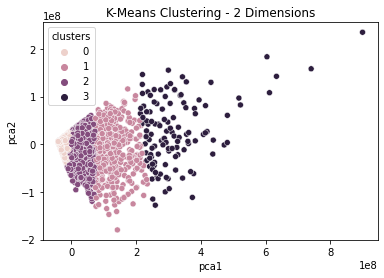

In [9]:
# Based on the elbow method graph, its appears the optimal number of cluster is 4. Lets run the model again
features = list(movies.columns)
data = movies[features]


kmeans2 = KMeans(n_clusters=4)
data['clusters'] = kmeans2.fit_predict(data)

# USE PCA (Principal Component Analysis) to reduce dimensions and plot the clusters
pca_components = 2
reduce_data = PCA(n_components=pca_components).fit_transform(data)
result = pd.DataFrame(reduce_data, columns=['pca1', 'pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=result)
plt.title("K-Means Clustering - 2 Dimensions")
plt.show()

clusters
0    7.313257e+06
1    9.095378e+07
2    4.274326e+07
3    1.505317e+08
Name: budget, dtype: float64


<AxesSubplot:title={'center':'Average Budget Per Cluster'}, xlabel='clusters', ylabel='Budget $'>

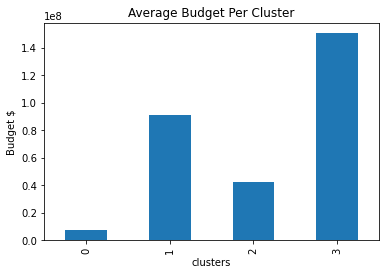

In [41]:
budget1 = data.groupby('clusters')['budget'].mean()
print(budget1)
budget1.plot(kind='bar', title='Average Budget Per Cluster', ylabel='Budget $')

clusters
0    7.923931e+06
1    1.374713e+08
2    5.047143e+07
3    3.291881e+08
Name: gross, dtype: float64


<AxesSubplot:title={'center':'Average Gross Per Cluster'}, xlabel='clusters', ylabel='Gross $'>

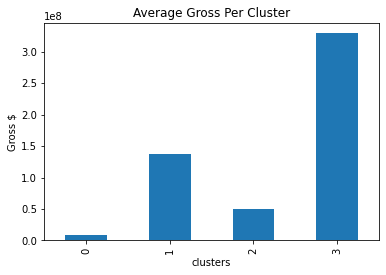

In [39]:
gross1 = data.groupby('clusters')['gross'].mean()
print(gross1)
gross1.plot(kind='bar', title='Average Gross Per Cluster', ylabel='Gross $')

clusters
0    104.003723
1    114.548263
2    109.712252
3    126.400000
Name: runtime, dtype: float64


<AxesSubplot:title={'center':'Average Runtime Per Cluster'}, xlabel='clusters', ylabel='Runtime (Minutes)'>

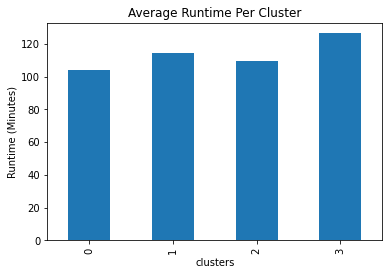

In [40]:
runtime1 = data.groupby('clusters')['runtime'].mean()
print(runtime1)
runtime1.plot(kind='bar', title='Average Runtime Per Cluster', ylabel='Runtime (Minutes)')

clusters
0    6.337363
1    6.700000
2    6.306312
3    7.323333
Name: score, dtype: float64


<AxesSubplot:title={'center':'Average Budget Per Cluster'}, xlabel='clusters', ylabel='Budget $'>

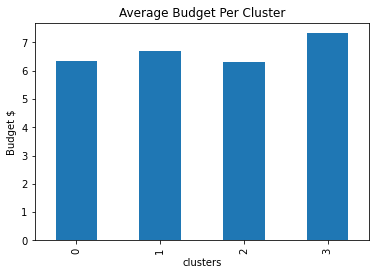

In [42]:
score1 = data.groupby(['clusters'])['score'].mean()
print(score1)
score1.plot(kind='bar', title='Average Score Per Cluster', ylabel='Score')

clusters
0     30338.773325
1    237917.306950
2    101182.241955
3    503655.308333
Name: votes, dtype: float64


<AxesSubplot:title={'center':'Average Votes Per Cluster'}, xlabel='clusters', ylabel='Score Votes'>

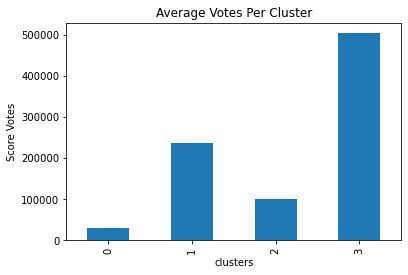

In [43]:
votes1 = data.groupby(['clusters'])['votes'].mean()
print(votes1)
votes1.plot(kind='bar', title='Average Votes Per Cluster', ylabel='Score Votes')

# How would you describe each cluster based on the given features?

#### **Cluster 0**
- Budget: 7.313257e+06 dollars
- Gross: 7.923931e+06 dollars
- Runtime: 104.003723 Minutes
- Critic Score: 6.337363
- Number of Votes: 30338.773325
#### **Cluster 1**
- Budget: 9.095378e+07 dollars
- Gross: 1.374713e+08 dollars
- Runtime: 114.548263 Minutes
- Critic Score: 6.700000
- Number of Votes: 237917.306950
#### **Cluster 2**
- Budget: 4.274326e+07 dollars
- Gross: 5.047143e+07 dollars
- Runtime: 109.712252 Minutes
- Critic Score: 6.306312
- Number of Votes: 101182.241955
#### **Cluster 3**
- Budget: 1.505317e+08 dollars
- Gross: 3.291881e+08 dollars
- Runtime: 126.400000 Minutes
- Critic Score: 7.323333
- Number of Votes: 503655.308333

To give further details, it seems that cluster 3 relates to movies with huge budgets and large box office profits. Cluster 3 movies are therefore very popular and receive tons of votes and a slightly higher critic score. Cluster 0 seems to be the exact opposite of Cluster 3, where the movie is small budget and does not get much recognition in terms of profits or scores. Clusters 1 and 2 seems to lie somewhere between the previous clusters with an outlier of average critic score being 6.7 for Cluster 1 and a smaller critic score of 6.3 for Cluster 2. The smallest critic score for movies in Cluster 2 is interesting because Cluster 2 has a larger budget than Cluster 0.

### Normalize the Data

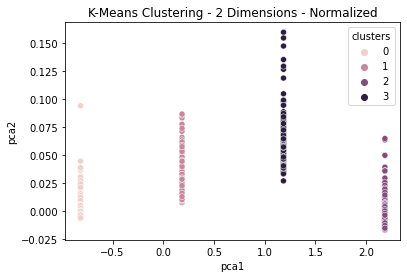

In [53]:
movies2 = preprocessing.normalize(movies, axis=0)
movies2 = pd.DataFrame(movies2)
# Based on the elbow method graph, its appears the optimal number of cluster is 4. Lets run the model again
features = list(movies2.columns)
data_norm = movies2[features]


kmeans3 = KMeans(n_clusters=4)
data_norm['clusters'] = kmeans3.fit_predict(data)

# USE PCA (Principal Component Analysis) to reduce dimensions and plot the clusters
pca_components = 2
reduce_data_norm = PCA(n_components=pca_components).fit_transform(data_norm)
graph_result = pd.DataFrame(reduce_data_norm, columns=['pca1', 'pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=graph_result)
plt.title("K-Means Clustering - 2 Dimensions - Normalized")
plt.show()

Visualizing the data before and after normalization showed a clear difference in their visual seperability. The scatter plot showed previously had all 4 clusters next to each other with no visual seperability. Therefore, categorizing data points into clusters was very precise and could be determined by very small changes in their respective values. After normalizing the input data and creating the scatter plot above, we can see a clear seperation between the data points that make up an individual cluster. Thus, normalizing the data creates clearer boundaries on what constitutes a data point belonging to cluster 3 instead of cluster 2.

# Question 2


According to the problem, there are 6 parking spots and 4 cars. Therefore, when determining the number of combinations, we would do 6 choose 4. The formula for this combination would be **6! / (4!(6-4)!)** with a result of 15. In total, there are 15 combinations or cases to consider in this problem. Among these 15 cases, there are exactly 5 cases where 2 adjacent parking spots are empty (SPOTS: 1-2, 2-3, 3-4, 4-5, 5-6). Similarly, there are also 5 combinations in which the last spot is open and would not require parallel parking. Although, there is one case where spot 5 and 6 are open that is represented in both of the adjacent and last-spot-open groups. Therefore, we should subtract 1 from our 10 cases that would not require parallel parking. **To conclude, the probability that you HAVE to parallel park is 6/15 or 40% (derived from the fact that NOT parallel parking happens in 9/15 cases or 60%).**